Node definitions

Key : Nodes (Changes states), Edges (Derivates to another thing)


In [1]:
from langgraph.graph import StateGraph, START, END, MessagesState

class State (MessagesState):
    customer_name: str
    my_age: int

def node_1(state: State):
    return state 

def node_2(state: State):
    return state

def node_3(state: State):
    return state

In [2]:
import random
from typing import Literal

def route_edge(state: State) -> Literal["node_2", "node_3"]:
    if random.random() < 0.5:
        return "node_2"
    else:
        return "node_3"

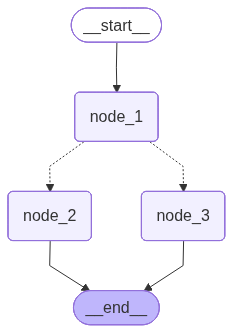

In [4]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", route_edge)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

agent = builder.compile()

display(Image(agent.get_graph().draw_mermaid_png()))